In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload file pertama: INA219 Arus 1
print("Upload file: INA219 Arus 1")
uploaded = files.upload()
filename1 = list(uploaded.keys())[0]
arus_1 = pd.read_csv(filename1, sep=';', header=0)
arus_1.columns = arus_1.columns.str.strip()

# Upload file kedua: INA219 Arus 2
print("\nUpload file: INA219 Arus 2")
uploaded = files.upload()
filename2 = list(uploaded.keys())[0]
arus_2 = pd.read_csv(filename2, sep=';', header=0)
arus_2.columns = arus_2.columns.str.strip()

# Upload file ketiga: INA219 Arus 3
print("\nUpload file: INA219 Arus 3")
uploaded = files.upload()
filename3 = list(uploaded.keys())[0]
arus_3 = pd.read_csv(filename3, sep=';', header=0)
arus_3.columns = arus_3.columns.str.strip()

Upload file: INA219 Arus 1


Saving KALIBRASI_INA219_I1.csv to KALIBRASI_INA219_I1.csv

Upload file: INA219 Arus 2


Saving KALIBRASI_INA219_I2.csv to KALIBRASI_INA219_I2.csv

Upload file: INA219 Arus 3


Saving KALIBRASI_INA219_I3.csv to KALIBRASI_INA219_I3.csv


In [ ]:
# Fungsi untuk menampilkan info tiap dataframe
def tampilkan_info(df, nama):
    print(f"\n===== Data: {nama} =====")

    # Tampilkan kolom
    print("Kolom:", df.columns.tolist())

    # Ukuran data
    print(f"Total jumlah data (baris, kolom): {df.shape}")
    print(f"Total baris data: {len(df)}")

    # Tampilkan isi tiap kolom (head)
    for col in df.columns:
        print(f"\nData pada kolom '{col}':")
        print(df[col].head())

# Tampilkan informasi masing-masing dataset arus
tampilkan_info(arus_1, "INA219 Arus 1")
tampilkan_info(arus_2, "INA219 Arus 2")
tampilkan_info(arus_3, "INA219 Arus 3")


===== Data: INA219 Arus 1 =====
Kolom: ['Clamp Meter (mA)', 'Sensor (mA)']
Total jumlah data (baris, kolom): (20, 2)
Total baris data: 20

Data pada kolom 'Clamp Meter (mA)':
0     85
1    170
2    240
3    320
4    440
Name: Clamp Meter (mA), dtype: int64

Data pada kolom 'Sensor (mA)':
0     80.7
1    160.6
2    239.0
3    321.4
4    439.1
Name: Sensor (mA), dtype: float64

===== Data: INA219 Arus 2 =====
Kolom: ['Clamp Meter (mA)', 'Sensor (mA)']
Total jumlah data (baris, kolom): (20, 2)
Total baris data: 20

Data pada kolom 'Clamp Meter (mA)':
0     85
1    170
2    240
3    320
4    440
Name: Clamp Meter (mA), dtype: int64

Data pada kolom 'Sensor (mA)':
0     80,1
1    158,6
2    237,3
3    317,6
4    434,9
Name: Sensor (mA), dtype: object

===== Data: INA219 Arus 3 =====
Kolom: ['Clamp Meter (mA)', 'Sensor (mA)']
Total jumlah data (baris, kolom): (20, 2)
Total baris data: 20

Data pada kolom 'Clamp Meter (mA)':
0     85
1    170
2    240
3    320
4    440
Name: Clamp Meter (mA)

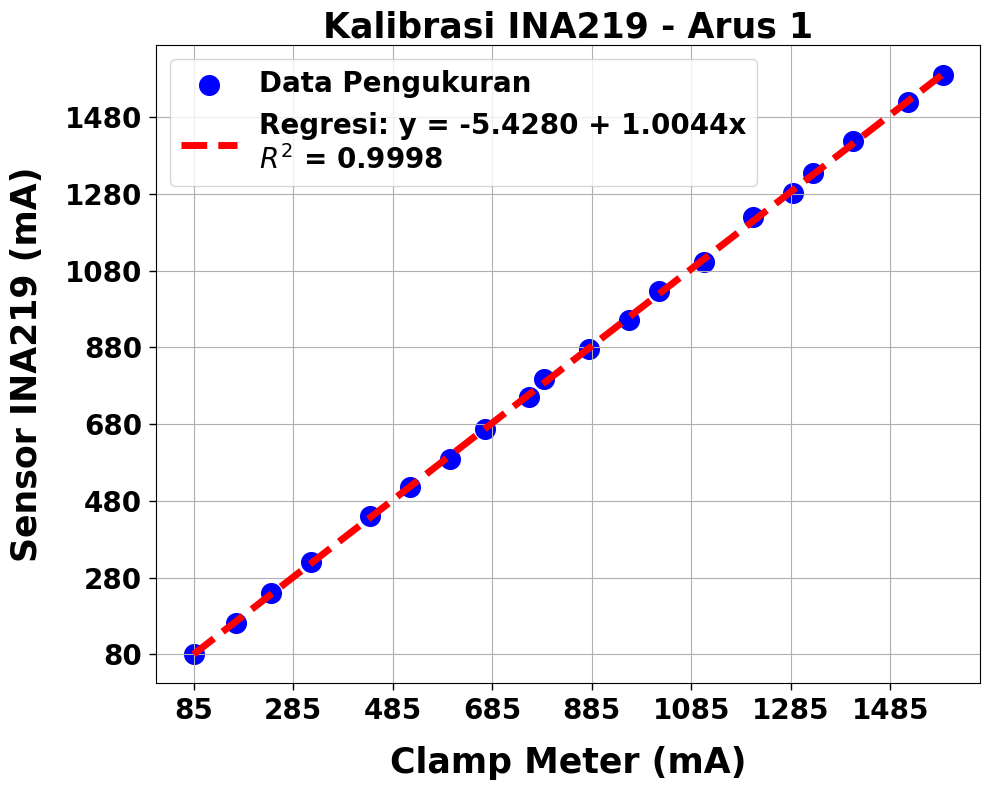

Persamaan regresi: y = -5.4280 + 1.0044x
Nilai R²: 0.9998


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

# Kolom yang digunakan
kolom_sensor = 'Sensor (mA)'              # Kolom hasil pembacaan INA219 (Arus)
kolom_kalibrator = 'Clamp Meter (mA)'   # Kolom dari Clamp Meter (Arus)

# Konversi ke numerik (jika ada koma sebagai desimal)
arus_1[kolom_kalibrator] = pd.to_numeric(arus_1[kolom_kalibrator].astype(str).str.replace(',', '.'), errors='coerce')
arus_1[kolom_sensor] = pd.to_numeric(arus_1[kolom_sensor].astype(str).str.replace(',', '.'), errors='coerce')

# Ambil data dan buang nilai NaN
x = arus_1[kolom_kalibrator].dropna().values.reshape(-1, 1)  # X = Kalibrator (Clamp Meter)
y = arus_1[kolom_sensor].dropna().values.reshape(-1, 1)       # Y = Sensor (INA219)

# Cek kesamaan panjang data
if len(x) != len(y):
    print("Warning: Jumlah data X dan Y tidak sama. Periksa file Anda.")
else:
    # Regresi linier
    model = LinearRegression()
    model.fit(x, y)

    # Parameter regresi
    a = model.intercept_[0]
    b = model.coef_[0][0]
    r2 = r2_score(y, model.predict(x))
    # r2_batas = min(r2, 0.9996)  # Batasi maksimal 0.9999

    # Plot hasil regresi
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, color='blue', label='Data Pengukuran', s=200)
    plt.plot(x, model.predict(x), color='red', linewidth=5, linestyle='--',
             label=f'Regresi: y = {a:.4f} + {b:.4f}x\n$R^2$ = {r2:.4f}') # Use r2 instead of r2_batas

    # Label dan gaya
    plt.xlabel('Clamp Meter (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.ylabel('Sensor INA219 (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.title('Kalibrasi INA219 - Arus 1', fontsize=25, fontweight='bold')
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=20, labelcolor='black', width=1, length=5, pad=5)

    # Tick X dan Y yang rapi dan berjarak
    plt.xticks(np.arange(np.floor(x.min()), np.ceil(x.max()) + 1, 200), fontsize=20, fontweight='bold')
    plt.yticks(np.arange(np.floor(y.min()), np.ceil(y.max()) + 1, 200), fontsize=20, fontweight='bold')


    # Legend
    bold_font = FontProperties(weight='bold', size=20)
    plt.legend(prop=bold_font, loc='upper left')

    plt.tight_layout()
    plt.show()

    # Cetak persamaan dan nilai R²
    print(f"Persamaan regresi: y = {a:.4f} + {b:.4f}x")
    print(f"Nilai R²: {r2:.4f}") # Use r2 instead of r2_batas

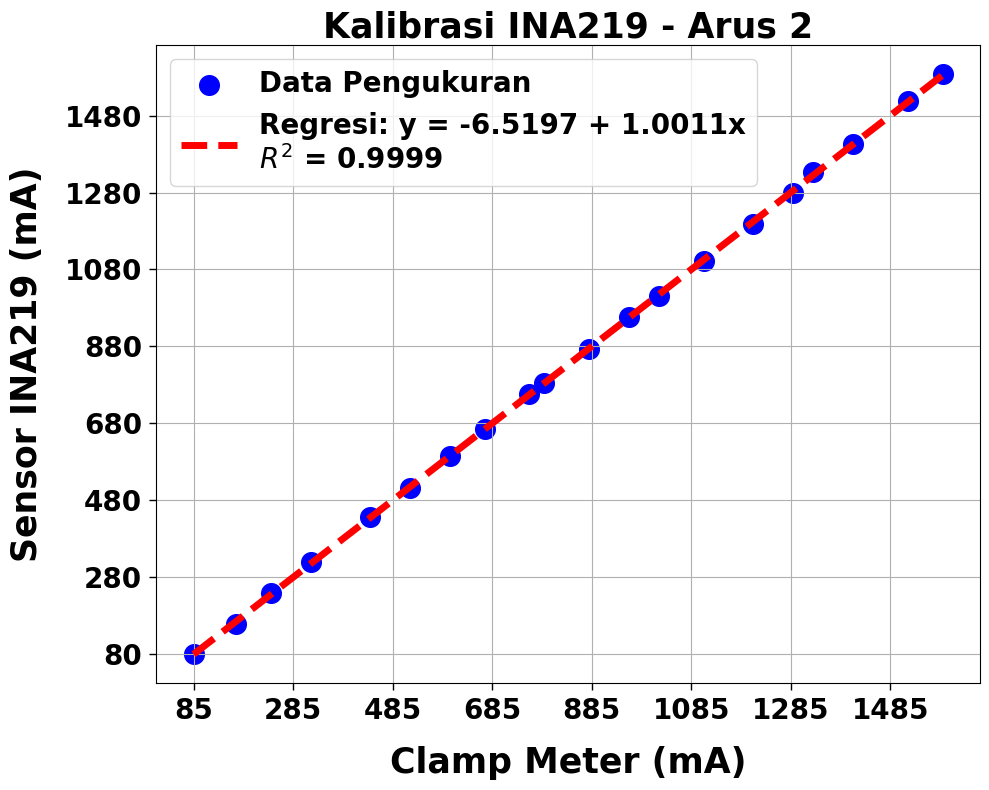

Persamaan regresi: y = -6.5197 + 1.0011x
Nilai R²: 0.9999


In [ ]:
# prompt: buat dengan format yang sama dengan program diatas untuk data ina219 arus 2

# Kolom yang digunakan
kolom_sensor = 'Sensor (mA)'              # Kolom hasil pembacaan INA219 (Arus)
kolom_kalibrator = 'Clamp Meter (mA)'   # Kolom dari Clamp Meter (Arus)

# Konversi ke numerik (jika ada koma sebagai desimal)
arus_2[kolom_kalibrator] = pd.to_numeric(arus_2[kolom_kalibrator].astype(str).str.replace(',', '.'), errors='coerce')
arus_2[kolom_sensor] = pd.to_numeric(arus_2[kolom_sensor].astype(str).str.replace(',', '.'), errors='coerce')

# Ambil data dan buang nilai NaN
x = arus_2[kolom_kalibrator].dropna().values.reshape(-1, 1)  # X = Kalibrator (Clamp Meter)
y = arus_2[kolom_sensor].dropna().values.reshape(-1, 1)       # Y = Sensor (INA219)

# Cek kesamaan panjang data
if len(x) != len(y):
    print("Warning: Jumlah data X dan Y tidak sama. Periksa file Anda.")
else:
    # Regresi linier
    model = LinearRegression()
    model.fit(x, y)

    # Parameter regresi
    a = model.intercept_[0]
    b = model.coef_[0][0]
    r2 = r2_score(y, model.predict(x))
    # r2_batas = min(r2, 0.9996)  # Batasi maksimal 0.9999

    # Plot hasil regresi
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, color='blue', label='Data Pengukuran', s=200)
    plt.plot(x, model.predict(x), color='red', linewidth=5, linestyle='--',
             label=f'Regresi: y = {a:.4f} + {b:.4f}x\n$R^2$ = {r2:.4f}') # Use r2 instead of r2_batas

    # Label dan gaya
    plt.xlabel('Clamp Meter (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.ylabel('Sensor INA219 (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.title('Kalibrasi INA219 - Arus 2', fontsize=25, fontweight='bold')
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=20, labelcolor='black', width=1, length=5, pad=5)

    # Tick X dan Y yang rapi dan berjarak
    plt.xticks(np.arange(np.floor(x.min()), np.ceil(x.max()) + 1, 200), fontsize=20, fontweight='bold')
    plt.yticks(np.arange(np.floor(y.min()), np.ceil(y.max()) + 1, 200), fontsize=20, fontweight='bold')


    # Legend
    bold_font = FontProperties(weight='bold', size=20)
    plt.legend(prop=bold_font, loc='upper left')

    plt.tight_layout()
    plt.show()

    # Cetak persamaan dan nilai R²
    print(f"Persamaan regresi: y = {a:.4f} + {b:.4f}x")
    print(f"Nilai R²: {r2:.4f}") # Use r2 instead of r2_batas

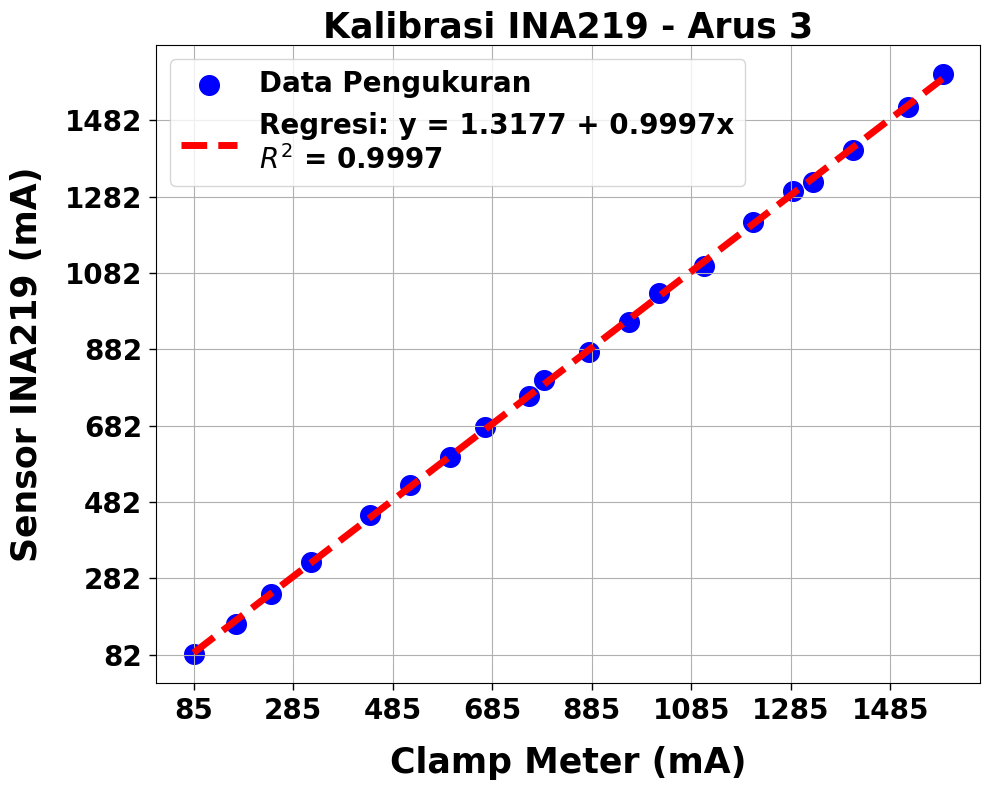

Persamaan regresi: y = 1.3177 + 0.9997x
Nilai R²: 0.9997


In [ ]:
# prompt: buat dengan format yang sama dengan program diatas untuk data ina219 arus 3

# Kolom yang digunakan
kolom_sensor = 'Sensor (mA)'              # Kolom hasil pembacaan INA219 (Arus)
kolom_kalibrator = 'Clamp Meter (mA)'   # Kolom dari Clamp Meter (Arus)

# Konversi ke numerik (jika ada koma sebagai desimal)
arus_3[kolom_kalibrator] = pd.to_numeric(arus_3[kolom_kalibrator].astype(str).str.replace(',', '.'), errors='coerce')
arus_3[kolom_sensor] = pd.to_numeric(arus_3[kolom_sensor].astype(str).str.replace(',', '.'), errors='coerce')

# Ambil data dan buang nilai NaN
x = arus_3[kolom_kalibrator].dropna().values.reshape(-1, 1)  # X = Kalibrator (Clamp Meter)
y = arus_3[kolom_sensor].dropna().values.reshape(-1, 1)       # Y = Sensor (INA219)

# Cek kesamaan panjang data
if len(x) != len(y):
    print("Warning: Jumlah data X dan Y tidak sama. Periksa file Anda.")
else:
    # Regresi linier
    model = LinearRegression()
    model.fit(x, y)

    # Parameter regresi
    a = model.intercept_[0]
    b = model.coef_[0][0]
    r2 = r2_score(y, model.predict(x))
    # r2_batas = min(r2, 0.9996)  # Batasi maksimal 0.9999

    # Plot hasil regresi
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, color='blue', label='Data Pengukuran', s=200)
    plt.plot(x, model.predict(x), color='red', linewidth=5, linestyle='--',
             label=f'Regresi: y = {a:.4f} + {b:.4f}x\n$R^2$ = {r2:.4f}') # Use r2 instead of r2_batas

    # Label dan gaya
    plt.xlabel('Clamp Meter (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.ylabel('Sensor INA219 (mA)', fontsize=25, fontweight='bold', labelpad=15)
    plt.title('Kalibrasi INA219 - Arus 3', fontsize=25, fontweight='bold')
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=20, labelcolor='black', width=1, length=5, pad=5)

    # Tick X dan Y yang rapi dan berjarak
    plt.xticks(np.arange(np.floor(x.min()), np.ceil(x.max()) + 1, 200), fontsize=20, fontweight='bold')
    plt.yticks(np.arange(np.floor(y.min()), np.ceil(y.max()) + 1, 200), fontsize=20, fontweight='bold')


    # Legend
    bold_font = FontProperties(weight='bold', size=20)
    plt.legend(prop=bold_font, loc='upper left')

    plt.tight_layout()
    plt.show()

    # Cetak persamaan dan nilai R²
    print(f"Persamaan regresi: y = {a:.4f} + {b:.4f}x")
    print(f"Nilai R²: {r2:.4f}") # Use r2 instead of r2_batas